**PROJECT: Seasonal Comparative Analysis of  Bike Rides in London and New York**

In [ ]:
# set-up spark (NB if Apache amend versions on download site we will need to amend path in wget command)
print("\nWelcome to advanced top sites")
!ls
!rm -f spark-3.3.[01]-bin-hadoop3.tgz* 
!rm -rf spark-3.3.[01]-bin-hadoop3
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget https://downloads.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
!tar -xf spark-3.3.2-bin-hadoop3.tgz
!ls -alt


Welcome to advanced top sites
sample_data
--2023-06-03 08:49:19--  https://downloads.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
Resolving downloads.apache.org (downloads.apache.org)... 135.181.214.104, 88.99.95.219, 2a01:4f9:3a:2c57::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|135.181.214.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299360284 (285M) [application/x-gzip]
Saving to: ‘spark-3.3.2-bin-hadoop3.tgz’

spark-3.3.2-bin-had 100%[===================>] 285.49M  12.6MB/s    in 24s     

2023-06-03 08:49:44 (11.8 MB/s) - ‘spark-3.3.2-bin-hadoop3.tgz’ saved [299360284/299360284]

total 292372
drwxr-xr-x  1 root root      4096 Jun  3 08:49 .
drwxr-xr-x  1 root root      4096 Jun  3 08:45 ..
drwxr-xr-x  1 root root      4096 Jun  1 22:51 sample_data
drwxr-xr-x  4 root root      4096 Jun  1 22:50 .config
-rw-r--r--  1 root root 299360284 Feb 10 21:28 spark-3.3.2-bin-hadoop3.tgz
drwxr-xr-x 13  501 1000      4096 Feb 10 

In [ ]:
# TO DO:  install findspark 
!pip3 install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# TO DO: init spark (ensure SPARK_HOME set to same version as we download)
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.2-bin-hadoop3"
import findspark
findspark.init()
from pyspark import SparkConf, SparkContext
# the next line gives us 'local' mode. try 'local[2]' to use 2 cores or 'master:NNNN' to run on Spark standalone cluster at port NNNN
spark_conf = SparkConf().setMaster('local[2]').setAppName('MyApp')
sc = SparkContext(conf=spark_conf)
# see what we have by examining the Spark User Interface
from pyspark.sql import *
from pyspark.sql.functions import *
# "SparkSession" and "sc" are are key handles in to Spark API
##SparkSession.builder.getOrCreate()
spark = SparkSession.builder.appName("bikes").getOrCreate()

In [ ]:
get bike hire file for given year from TfL open data

**Data Collection (Source: Transport For London (TFL))**

In [ ]:
# get bike hire file for given year from TfL open data
!wget https://cycling.data.tfl.gov.uk/usage-stats/cyclehireusagestats-2014.zip
!unzip cyclehireusagestats-2014.zip

--2023-06-03 09:00:42--  https://cycling.data.tfl.gov.uk/usage-stats/cyclehireusagestats-2014.zip
Resolving cycling.data.tfl.gov.uk (cycling.data.tfl.gov.uk)... 104.16.100.13, 104.16.101.13
Connecting to cycling.data.tfl.gov.uk (cycling.data.tfl.gov.uk)|104.16.100.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 225215129 (215M) [application/zip]
Saving to: ‘cyclehireusagestats-2014.zip’

cyclehireusagestats 100%[===================>] 214.78M  22.9MB/s    in 11s     

2023-06-03 09:00:54 (19.0 MB/s) - ‘cyclehireusagestats-2014.zip’ saved [225215129/225215129]

Archive:  cyclehireusagestats-2014.zip
  inflating: 1. Journey Data Extract 05Jan14-02Feb14.csv  
  inflating: 10a. Journey Data Extract 14Sep14-27Sep14.csv  
  inflating: 10b. Journey Data Extract 28Sep14-11Oct14.csv  
  inflating: 11a. Journey Data Extract 12Oct14-08Nov14.csv  
  inflating: 11b. Journey Data Extract 12Oct14-08Nov14.csv  
  inflating: 12a. Journey Data Extract 09Nov14-06Dec14.csv  
  

In [ ]:
file1="./2. Journey*csv" # 03 Feb to 01 Mar
file2="./3. Journey*csv" # 02 Mar to 31 Mar
file3="./4. Journey*csv" # 01 Apr to 26 Apr
file4="./5. Journey*csv" # 27 Apr to 24 May
file5="./6. Journey*csv" # 25 May to 21 Jun
# we might say therefore that data in these 3 files corresponds to "Spring" in the UK
spring_df = (spark.read.format("csv")
         .option("header", "true")
         .option("inferSchema", "true")
         .load([file1, file2, file3, file4, file5])) # i.e pass a Python list of files to load (into a single DF)

In [ ]:
file6="./9b Journey*csv"  # 01 Sep to 13 Sep
file7="./10a. Journey*csv" # 14 Sep to 27 Sep
file8="./10b. Journey*csv" # 28 Sep to 11 Oct
file9="./11b. Journey*csv" # 12 Oct to 08 Nov
file10="./12b. Journey*csv" # 09 Nov to 06 Dec

# we might say therefore that data in these 3 files corresponds to "Autumn" in the UK
autumn_df = (spark.read.format("csv")
         .option("header", "true")
         .option("inferSchema", "true")
         .load([file6, file7, file8, file9, file10])) # i.e pass a Python list of files to load (into a single DF)

In [ ]:
autumn_df.count(), spring_df.count()

(2528436, 3667207)

In [ ]:
autumn_df.show(2), spring_df.show(2)

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----+----+----+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name| _c9|_c10|_c11|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----+----+----+
| 37875851|     120|   3229|28/09/2014 00:02|          450|Jubilee Street, S...|28/09/2014 00:00|            443|Philpot Street, W...|null|null|null|
| 37875861|    1080|   3283|28/09/2014 00:18|          645|Great Suffolk Str...|28/09/2014 00:00|             14|Belgrove Street ,...|null|null|null|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----+----+----+
only showing top 2 rows

+---------+--------+-------+----------------+-------------+----------------

(None, None)

**Data Preparation and Pre-Processing**

In [ ]:
# Convert to standard date format

spring_df = spring_df \
  .withColumn("Start Date", to_timestamp("Start Date", "dd/MM/yyyy HH:mm")) \
  .withColumn("End Date", to_timestamp("End Date", "dd/MM/yyyy HH:mm")) \
  .select("*")

In [ ]:
autumn_df = autumn_df \
  .withColumn("Start Date", to_timestamp("Start Date", "dd/MM/yyyy HH:mm")) \
  .withColumn("End Date", to_timestamp("End Date", "dd/MM/yyyy HH:mm")) \
  .select("*")

In [ ]:
# Select Valid Records

spring_df = spring_df.filter(
    (spring_df['Start Date'] >= "2014-03-01 00:00:00") & 
    (spring_df['Start Date'] <= "2014-05-31 23:59:59") & 
    (spring_df['End Date'] <= "2014-05-31 23:59:59") &
    (spring_df['Duration'] > 0)
    )
spring_df.show(2)

+---------+--------+-------+-------------------+-------------+--------------------+-------------------+---------------+--------------------+----+----+----+
|Rental Id|Duration|Bike Id|           End Date|EndStation Id|     EndStation Name|         Start Date|StartStation Id|   StartStation Name| _c9|_c10|_c11|
+---------+--------+-------+-------------------+-------------+--------------------+-------------------+---------------+--------------------+----+----+----+
| 33253206|    1140|  11439|2014-05-27 00:59:00|          695|Islington Green, ...|2014-05-27 00:40:00|             81|Great Titchfield ...|null|null|null|
| 33345935|     660|  10792|2014-05-30 18:00:00|          326|Graham Street, Angel|2014-05-30 17:49:00|            203|West Smithfield R...|null|null|null|
+---------+--------+-------+-------------------+-------------+--------------------+-------------------+---------------+--------------------+----+----+----+
only showing top 2 rows



In [ ]:
autumn_df = autumn_df.filter(
    (autumn_df['Start Date'] >= "2014-09-01 00:00:00") & 
    (autumn_df['Start Date'] <= "2014-11-30 23:59:58") & 
    (autumn_df['End Date'] <= "2014-11-30 23:59:59") &
    (autumn_df['Duration'] > 0)
    )
autumn_df.show(2)

+---------+--------+-------+-------------------+-------------+--------------------+-------------------+---------------+--------------------+----+----+----+
|Rental Id|Duration|Bike Id|           End Date|EndStation Id|     EndStation Name|         Start Date|StartStation Id|   StartStation Name| _c9|_c10|_c11|
+---------+--------+-------+-------------------+-------------+--------------------+-------------------+---------------+--------------------+----+----+----+
| 37875851|     120|   3229|2014-09-28 00:02:00|          450|Jubilee Street, S...|2014-09-28 00:00:00|            443|Philpot Street, W...|null|null|null|
| 37875861|    1080|   3283|2014-09-28 00:18:00|          645|Great Suffolk Str...|2014-09-28 00:00:00|             14|Belgrove Street ,...|null|null|null|
+---------+--------+-------+-------------------+-------------+--------------------+-------------------+---------------+--------------------+----+----+----+
only showing top 2 rows



In [ ]:
autumn_df[["_c9", "_c10", "_c11"]].distinct().show()
spring_df[["_c9", "_c10", "_c11"]].distinct().show()

+----+----+----+
| _c9|_c10|_c11|
+----+----+----+
|null|null|null|
+----+----+----+

+----+----+----+
| _c9|_c10|_c11|
+----+----+----+
|null|null|null|
+----+----+----+



In [ ]:
drop_columns = ["_c9", "_c10", "_c11"]
autumn_df = autumn_df.drop(*drop_columns)
spring_df = spring_df.drop(*drop_columns)

In [ ]:
autumn_df.show(2), spring_df.show(2)

+---------+--------+-------+-------------------+-------------+--------------------+-------------------+---------------+--------------------+
|Rental Id|Duration|Bike Id|           End Date|EndStation Id|     EndStation Name|         Start Date|StartStation Id|   StartStation Name|
+---------+--------+-------+-------------------+-------------+--------------------+-------------------+---------------+--------------------+
| 37875851|     120|   3229|2014-09-28 00:02:00|          450|Jubilee Street, S...|2014-09-28 00:00:00|            443|Philpot Street, W...|
| 37875861|    1080|   3283|2014-09-28 00:18:00|          645|Great Suffolk Str...|2014-09-28 00:00:00|             14|Belgrove Street ,...|
+---------+--------+-------+-------------------+-------------+--------------------+-------------------+---------------+--------------------+
only showing top 2 rows

+---------+--------+-------+-------------------+-------------+--------------------+-------------------+---------------+----------

(None, None)

In [ ]:
autumn_df.count(), spring_df.count()

(1902858, 2416941)

In [ ]:
# Check for missing values in each column

from pyspark.sql.functions import col, sum

missing_counts = autumn_df.agg(*[
    sum(col(c).isNull().cast("int")).alias(c) for c in autumn_df.columns
])

# Display the missing value counts
missing_counts.show()

+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|Rental Id|Duration|Bike Id|End Date|EndStation Id|EndStation Name|Start Date|StartStation Id|StartStation Name|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|        0|       0|      0|       0|           40|             40|         0|              0|                0|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+



**IDENTIFY AND DEAL WITH MISSING VALUES**

In [ ]:
# Check for missing values in each column

from pyspark.sql.functions import col, sum

spring_df.select([sum(col(c).isNull().cast("int")).alias(c) for c in spring_df.columns]).show()


+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|Rental Id|Duration|Bike Id|End Date|EndStation Id|EndStation Name|Start Date|StartStation Id|StartStation Name|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|        0|       0|      0|       0|           20|             20|         0|              0|                0|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+



In [ ]:
autumn_df.select([sum(col(c).isNull().cast("int")).alias(c) for c in autumn_df.columns]).show()

+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|Rental Id|Duration|Bike Id|End Date|EndStation Id|EndStation Name|Start Date|StartStation Id|StartStation Name|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|        0|       0|      0|       0|           40|             40|         0|              0|                0|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+



In [ ]:
# group by EndStation ID, obtain and fill missing values of EndStationID with its modal value
grouped_ID  = spring_df.groupBy('EndStation Id').count()

# find the mode by ordering the count column in descending order
mode_EndId = grouped_ID.orderBy(desc('count')).select(col('EndStation Id')).first()[0]

spring_df = spring_df.fillna({'EndStation Id': mode_EndId})

In [ ]:
# group by fruits column and count the frequency of each value
grouped_name = spring_df.groupBy('EndStation Name').count()

# find the mode by ordering the count column in descending order
mode_EndName = grouped_name.orderBy(desc('count')).select(col('EndStation Name')).first()[0]

spring_df = spring_df.fillna({'EndStation Name': mode_EndName})

In [ ]:
spring_df.select([sum(col(c).isNull().cast("int")).alias(c) for c in spring_df.columns]).show()

+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|Rental Id|Duration|Bike Id|End Date|EndStation Id|EndStation Name|Start Date|StartStation Id|StartStation Name|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|        0|       0|      0|       0|            0|              0|         0|              0|                0|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+



In [ ]:
from pyspark.sql.functions import col

# select the 'Duration' column and call describe()
spring_df.select(col('Duration')).describe().show()

+-------+------------------+
|summary|          Duration|
+-------+------------------+
|  count|           2416941|
|   mean| 1489.659689665573|
| stddev|11493.607044288816|
|    min|            100020|
|    max|             99900|
+-------+------------------+



In [ ]:
# group by EndStation ID, obtain and fill missing values of EndStationID with its modal value
autumn_ID  = autumn_df.groupBy('EndStation Id').count()

# find the mode by ordering the count column in descending order
autumn_mode_EndId = autumn_ID.orderBy(desc('count')).select(col('EndStation Id')).first()[0]

autumn_df = autumn_df.fillna({'EndStation Id': autumn_mode_EndId})

In [ ]:
# group by EndStation Name, obtain and fill missing values of EndStation Name with its modal value

autumn_name = autumn_df.groupBy('EndStation Name').count()

# find the mode by ordering the count column in descending order
autumn_mode_EndName = autumn_name.orderBy(desc('count')).select(col('EndStation Name')).first()[0]

autumn_df = autumn_df.fillna({'EndStation Name': autumn_mode_EndName})

In [ ]:
autumn_df.select([sum(col(c).isNull().cast("int")).alias(c) for c in autumn_df.columns]).show()

+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|Rental Id|Duration|Bike Id|End Date|EndStation Id|EndStation Name|Start Date|StartStation Id|StartStation Name|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|        0|       0|      0|       0|            0|              0|         0|              0|                0|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+



In [ ]:
# assume that you have already created a PySpark DataFrame called 'df'
from pyspark.sql.functions import col

# select the 'Duration' column and call describe()
autumn_df.select(col('Duration')).describe().show()


+-------+------------------+
|summary|          Duration|
+-------+------------------+
|  count|           1902858|
|   mean|1433.2908183374693|
| stddev| 12029.97600157644|
|    min|            100020|
|    max|             99900|
+-------+------------------+



**EXPLORATORY DATA ANALYSIS**

In [ ]:
from pyspark.sql.functions import expr

# define the percentiles to compute
percentiles = [0.25, 0.5, 0.75, 0.9, 0.95, 0.99]

# compute the duration percentiles
duration_percentiles = spring_df.selectExpr("percentile_approx(duration, array(" + ", ".join(str(p) for p in percentiles) + "))").collect()[0][0]

# create a list of tuples with the percentile and its corresponding duration value
percentile_values = [(int(percentiles[i] * 100), duration_percentiles[i]) for i in range(len(percentiles))]

# convert the list into a PySpark DataFrame
spring_per_duration = spark.createDataFrame(percentile_values, schema=["Percentile", "Duration (secs)"])

# Display Percentile values of trip duration for Spring
spring_per_duration.show()

+----------+---------------+
|Percentile|Duration (secs)|
+----------+---------------+
|        25|          480.0|
|        50|          840.0|
|        75|         1320.0|
|        90|         2160.0|
|        95|         3300.0|
|        99|         8580.0|
+----------+---------------+



sample of  Duration    2393068
dtype: int64


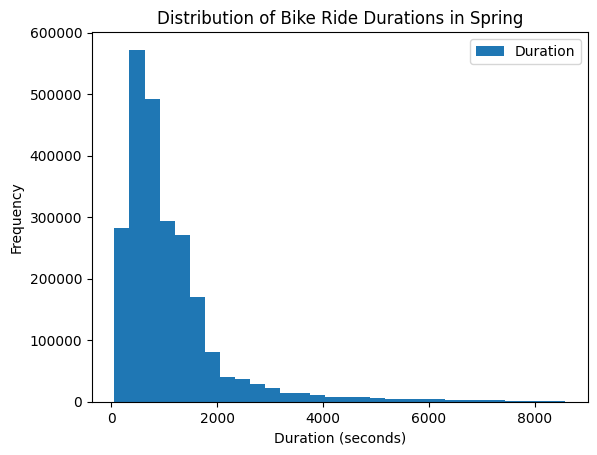

In [ ]:
import pyspark.sql.functions as F
import matplotlib.pyplot as plt

spring_df = spring_df.withColumn("Duration", F.col("Duration").cast("float"))


hist_spring = spring_df.filter("Duration <= 8580")[["Duration"]].toPandas()
print("sample of ",hist_spring.count())

hist_spring.plot(kind="hist", bins=30)
plt.title("Distribution of Bike Ride Durations in Spring")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# compute the duration percentiles
duration_percentiles = autumn_df.selectExpr("percentile_approx(duration, array(" + ", ".join(str(p) for p in percentiles) + "))").collect()[0][0]

# create a list of tuples with the percentile and its corresponding duration value
percentile_values = [(int(percentiles[i] * 100), duration_percentiles[i]) for i in range(len(percentiles))]

# convert the list into a PySpark DataFrame
autumn_per_duration = spark.createDataFrame(percentile_values, schema=["Percentile", "Duration (secs)"])

# Display Percentile values of trip duration for Spring
autumn_per_duration.show()

+----------+---------------+
|Percentile|Duration (secs)|
+----------+---------------+
|        25|          480.0|
|        50|          840.0|
|        75|         1320.0|
|        90|         1980.0|
|        95|         3000.0|
|        99|         7560.0|
+----------+---------------+



sample of  Duration    1884118
dtype: int64


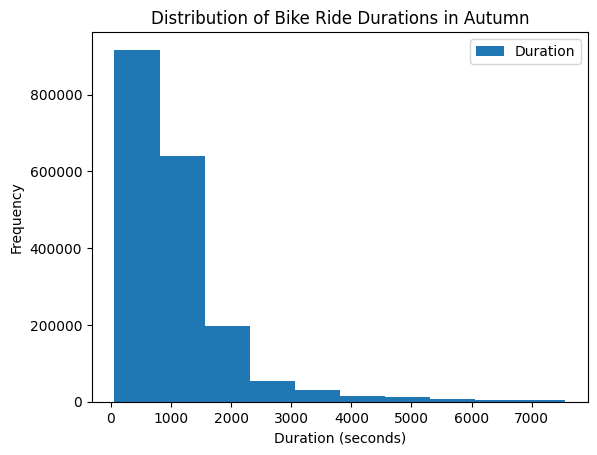

In [ ]:
autumn_df = autumn_df.withColumn("Duration", F.col("Duration").cast("float"))

hist_autumn = autumn_df.filter("Duration <= 7560")[["Duration"]].toPandas()
print("sample of ",hist_autumn.count())

hist_autumn.plot(kind="hist") # do without and then repeat but set #bins same as Excel (presume 94 bins)
plt.title("Distribution of Bike Ride Durations in Autumn")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.show()

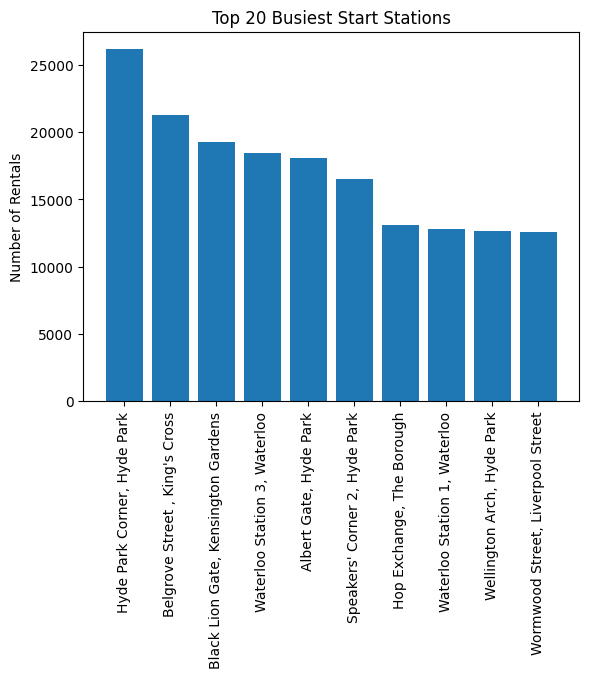

In [ ]:
from pyspark.sql.functions import count
import pyspark.sql.functions as F
import matplotlib.pyplot as plt

busiest_start_stations = spring_df.groupBy('StartStation Name').agg(count('Rental Id').alias('num_rentals')) \
                                          .orderBy(F.desc('num_rentals')).limit(10).toPandas()

# plot a bar chart to visualize the busiest start stations
plt.bar(busiest_start_stations['StartStation Name'], busiest_start_stations['num_rentals'])
plt.title('Top 20 Busiest Start Stations')
plt.xticks(rotation=90)
plt.ylabel('Number of Rentals')
plt.show()


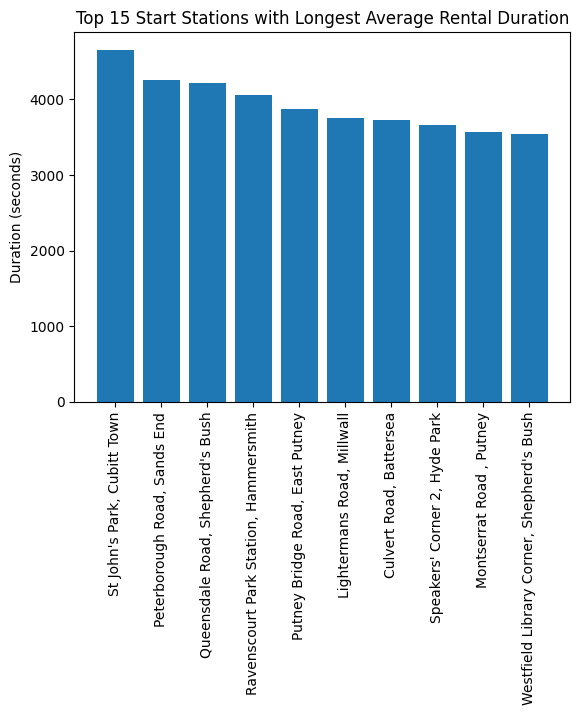

In [ ]:
avg_duration_by_start_station = spring_df.groupBy('StartStation Name').agg(avg('Duration').alias('avg_duration')) \
                                               .orderBy(F.desc('avg_duration')).limit(10).toPandas()

# plot a bar chart to visualize the start stations with the longest average rental duration
plt.bar(avg_duration_by_start_station['StartStation Name'], avg_duration_by_start_station['avg_duration'])
plt.title('Top 15 Start Stations with Longest Average Rental Duration')
plt.xticks(rotation=90)
plt.ylabel('Duration (seconds)')
plt.show()

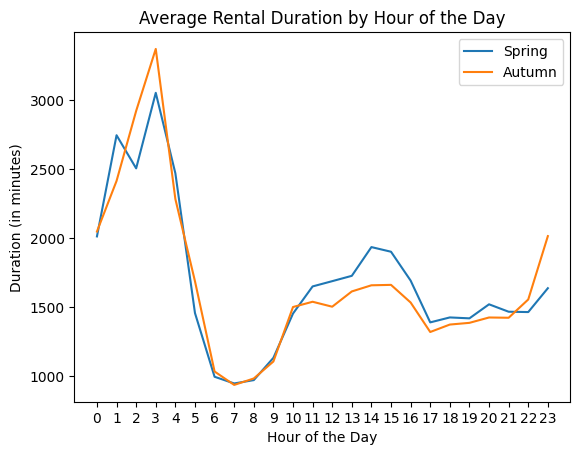

In [ ]:
from pyspark.sql.functions import avg, hour
import pyspark.sql.functions as F
import matplotlib.pyplot as plt

# assuming the dataframe is named 'bike_rentals_df'
avg_duration_by_hour_spring = spring_df.groupBy(hour('Start Date').alias('hour')).agg(avg('Duration').alias('avg_duration')) \
                                      .orderBy('hour').toPandas()

avg_duration_by_hour_autumn = autumn_df.groupBy(hour('Start Date').alias('hour')).agg(avg('Duration').alias('avg_duration')) \
                                      .orderBy('hour').toPandas()
                                      

plt.plot(avg_duration_by_hour_spring['hour'], avg_duration_by_hour_spring['avg_duration'], label='Spring')
plt.plot(avg_duration_by_hour_autumn['hour'], avg_duration_by_hour_autumn['avg_duration'], label='Autumn')
plt.title('Average Rental Duration by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Duration (in minutes)')
plt.xticks(range(0, 24))
plt.legend()
plt.show()


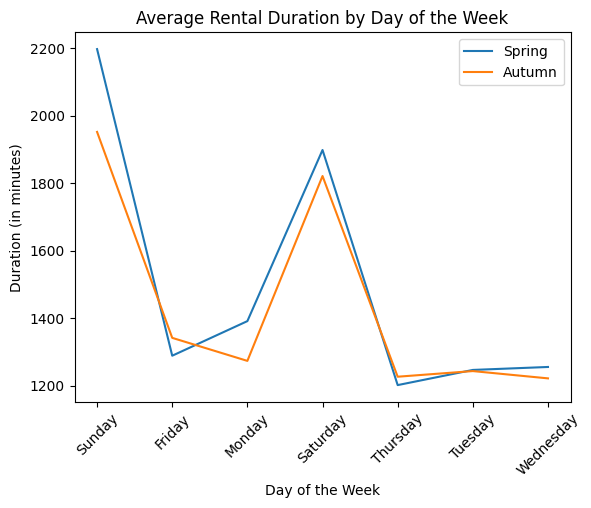

In [ ]:
# assuming the dataframe is named 'bike_rentals_df'
avg_duration_by_day_spring = spring_df.groupBy(F.date_format('Start Date', 'EEEE').alias('day_of_week')).agg(avg('Duration').alias('avg_duration')) \
                                      .orderBy(F.when(F.col('day_of_week') == 'Sunday', 1).otherwise(2), 'day_of_week').toPandas()

avg_duration_by_day_autumn = autumn_df.groupBy(F.date_format('Start Date', 'EEEE').alias('day_of_week')).agg(avg('Duration').alias('avg_duration')) \
                                      .orderBy(F.when(F.col('day_of_week') == 'Sunday', 1).otherwise(2), 'day_of_week').toPandas()
                                      

plt.plot(avg_duration_by_day_spring['day_of_week'], avg_duration_by_day_spring['avg_duration'], label='Spring')
plt.plot(avg_duration_by_day_autumn['day_of_week'], avg_duration_by_day_autumn['avg_duration'], label='Autumn')
plt.title('Average Rental Duration by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Duration (in minutes)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


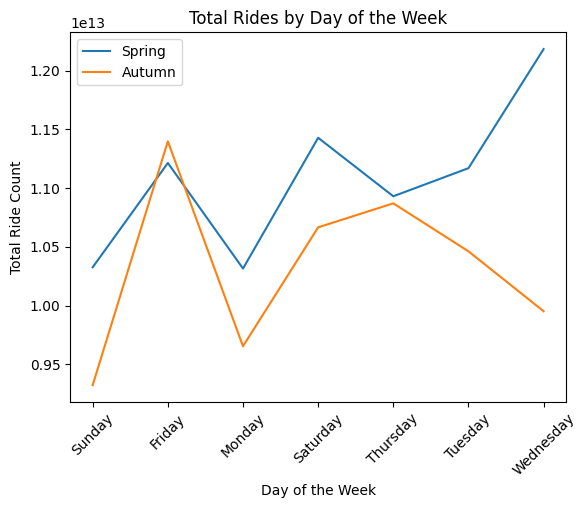

In [ ]:
# assuming the dataframe is named 'bike_rentals_df'
total_ride_by_day_spring = spring_df.groupBy(F.date_format('Start Date', 'EEEE').alias('day_of_week')).agg(sum('Rental Id').alias('total_rides')) \
                                      .orderBy(F.when(F.col('day_of_week') == 'Sunday', 1).otherwise(2), 'day_of_week').toPandas()

total_ride_by_day_autumn = autumn_df.groupBy(F.date_format('Start Date', 'EEEE').alias('day_of_week')).agg(sum('Rental Id').alias('total_rides')) \
                                      .orderBy(F.when(F.col('day_of_week') == 'Sunday', 1).otherwise(2), 'day_of_week').toPandas()
                                      

plt.plot(avg_duration_by_day_spring['day_of_week'], total_ride_by_day_spring['total_rides'], label='Spring')
plt.plot(avg_duration_by_day_autumn['day_of_week'], total_ride_by_day_autumn['total_rides'], label='Autumn')
plt.title('Total Rides by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Ride Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [ ]:
# import required functions
from pyspark.sql.functions import count, avg, year, month, to_timestamp
import pandas as pd

# convert the Start Date column to a timestamp column for both spring and autumn dataframes
spring_month = spring_df.withColumn('Start Timestamp', to_timestamp('Start Date', 'yyyy-MM-dd HH:mm:ss'))
autumn_month = autumn_df.withColumn('Start Timestamp', to_timestamp('Start Date', 'yyyy-MM-dd HH:mm:ss'))

# calculate the total bike rides per month for both spring and autumn seasons
spring_monthly_rides = spring_month.groupBy(year('Start Timestamp').alias('year'), month('Start Timestamp').alias('month')) \
                                    .agg(count('*').alias('spring_total_rides')) \
                                    .orderBy('year', 'month')
autumn_monthly_rides = autumn_month.groupBy(year('Start Timestamp').alias('year'), month('Start Timestamp').alias('month')) \
                                    .agg(count('*').alias('autumn_total_rides')) \
                                    .orderBy('year', 'month')


# convert the resulting dataframes to Pandas dataframes for better visualization
spring_monthly_rides_pd = spring_monthly_rides.toPandas()
autumn_monthly_rides_pd = autumn_monthly_rides.toPandas()

# print the resulting dataframes
print("Total monthly rides (Spring)")
print(spring_monthly_rides_pd)

print("\nTotal monthly rides (Autumn)")
print(autumn_monthly_rides_pd)


Total monthly rides (Spring)
   year  month  spring_total_rides
0  2014      3              746214
1  2014      4              793917
2  2014      5              876810

Total monthly rides (Autumn)
   year  month  autumn_total_rides
0  2014      9             1043454
1  2014     10              584878
2  2014     11              274526


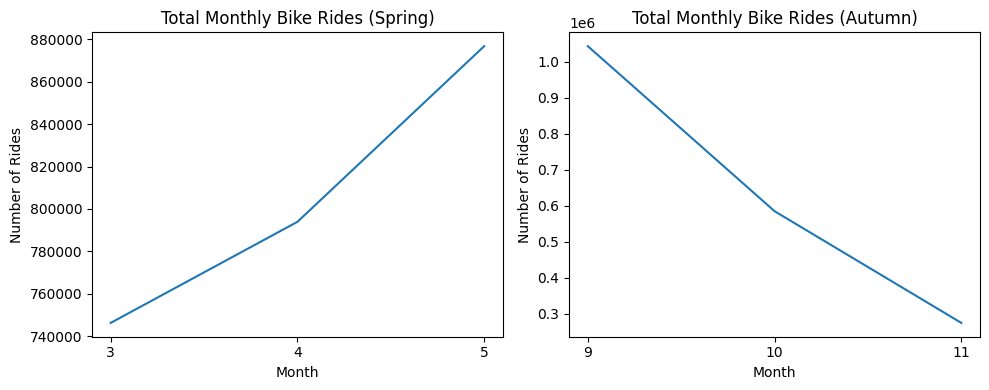

In [ ]:
# create two subplots, one for spring and one for autumn

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].plot(spring_monthly_rides_pd['month'], spring_monthly_rides_pd['spring_total_rides'])
axes[0].set_title('Total Monthly Bike Rides (Spring)')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Rides')
axes[0].set_xticks([3, 4, 5])

axes[1].plot(autumn_monthly_rides_pd['month'], autumn_monthly_rides_pd['autumn_total_rides'])
axes[1].set_title('Total Monthly Bike Rides (Autumn)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Rides')
axes[1].set_xticks([9, 10, 11])


plt.tight_layout()
plt.show()

In [ ]:
# calculate the average bike ride duration per month for both spring and autumn seasons
spring_avg_monthly_rides = spring_month.groupBy(year('Start Timestamp').alias('year'), month('Start Timestamp').alias('month')) \
                                        .agg(avg('Duration').alias('spring_avg_duration')) \
                                        .orderBy('year', 'month')

autumn_avg_monthly_rides = autumn_month.groupBy(year('Start Timestamp').alias('year'), month('Start Timestamp').alias('month')) \
                                        .agg(avg('Duration').alias('autumn_avg_duration')) \
                                        .orderBy('year', 'month')

                                        # convert the resulting dataframes to Pandas dataframes for better visualization
spring_avg_monthly_rides_pd = spring_avg_monthly_rides.toPandas()
autumn_avg_monthly_rides_pd = autumn_avg_monthly_rides.toPandas()

# print the resulting dataframes
print("Average monthly ride duration (Spring)")
print(spring_avg_monthly_rides_pd)

print("\nAverage monthly ride duration (Autumn)")
print(autumn_avg_monthly_rides_pd)

Average monthly ride duration (Spring)
   year  month  spring_avg_duration
0  2014      3          1441.095530
1  2014      4          1530.179528
2  2014      5          1494.301365

Average monthly ride duration (Autumn)
   year  month  autumn_avg_duration
0  2014      9          1413.689056
1  2014     10          1549.577416
2  2014     11          1260.046990


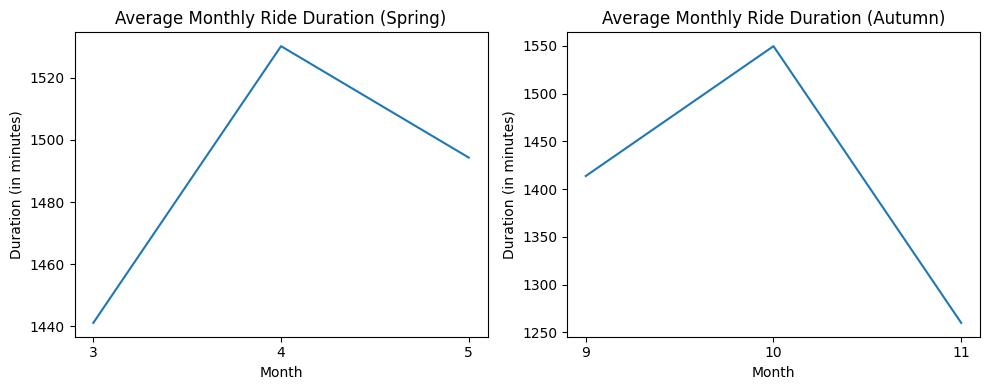

In [ ]:
# create two subplots, one for spring and one for autumn
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# plot the average monthly ride duration for spring in the left subplot
axes[0].plot(spring_avg_monthly_rides_pd['month'], spring_avg_monthly_rides_pd['spring_avg_duration'])
axes[0].set_title('Average Monthly Ride Duration (Spring)')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Duration (in minutes)')
axes[0].set_xticks([3, 4, 5])

# plot the average monthly ride duration for autumn in the right subplot
axes[1].plot(autumn_avg_monthly_rides_pd['month'], autumn_avg_monthly_rides_pd['autumn_avg_duration'])
axes[1].set_title('Average Monthly Ride Duration (Autumn)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Duration (in minutes)')
axes[1].set_xticks([9, 10, 11])

# adjust the layout and display the plots
plt.tight_layout()
plt.show()

**Hypothesis Test: "In 2014, the mean ride durations for Autumn and Spring are equal"**

In [ ]:
from pyspark.sql.functions import col, month
from scipy.stats import ttest_ind

# filter data for autumn and spring
autumn_ride = autumn_df.filter((month(col("Start Date")) >= 9) | (month(col("Start Date")) <= 11))
spring_ride = spring_df.filter((month(col("Start Date")) >= 3) & (month(col("Start Date")) <= 5))

# calculate mean ride duration for autumn and spring
autumn_mean_duration = autumn_ride.agg({"Duration": "avg"}).collect()[0][0]
spring_mean_duration = spring_ride.agg({"Duration": "avg"}).collect()[0][0]

# perform two-sample t-test
t_stat, p_value = ttest_ind(
    autumn_ride.select("Duration").rdd.flatMap(lambda x: x).collect(),
    spring_ride.select("Duration").rdd.flatMap(lambda x: x).collect(),
    equal_var=False
)

# check if the p-value is significant
if p_value < 0.05:
    print("The p-value is", p_value, "which is less than the significance level of 0.05.")
    print("Therefore, we reject the null hypothesis that the mean ride durations for Autumn and Spring are equal.")
    if autumn_mean_duration > spring_mean_duration:
        print("Furthermore, the mean ride duration in Autumn is significantly longer than in Spring.")
    else:
        print("Furthermore, the mean ride duration in Spring is significantly longer than in Autumn.")
else:
    print("The p-value is", p_value, "which is greater than the significance level of 0.05.")
    print("Therefore, we fail to reject the null hypothesis that the mean ride durations for Autumn and Spring are equal.")


The p-value is 8.206172181649084e-07 which is less than the significance level of 0.05.
Therefore, we reject the null hypothesis that the mean ride durations for Autumn and Spring are equal.
Furthermore, the mean ride duration in Spring is significantly longer than in Autumn.


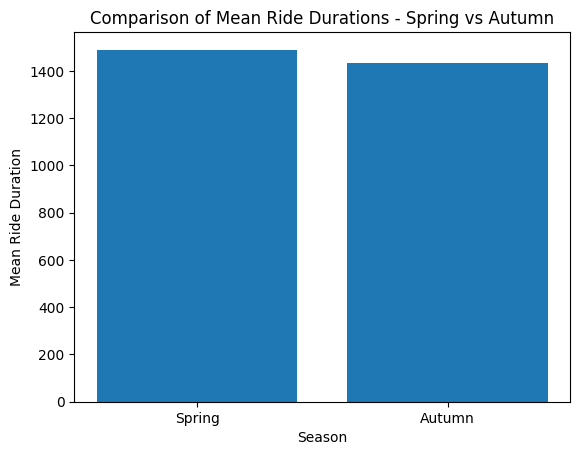

In [ ]:
import matplotlib.pyplot as plt

# Define the durations and corresponding labels
durations = [spring_mean_duration, autumn_mean_duration]
labels = ['Spring', 'Autumn']

# Plotting the bar chart
plt.bar(labels, durations)
plt.xlabel('Season')
plt.ylabel('Mean Ride Duration')
plt.title('Comparison of Mean Ride Durations - Spring vs Autumn')
plt.show()


**SECOND DATASET OBTAINED FROM CITIBIKE FOR BIKE TRIPS IN NEW YORK**

In [ ]:
# Define the URLs for the datasets
urls = [
    "https://s3.amazonaws.com/tripdata/201403-citibike-tripdata.zip",
    "https://s3.amazonaws.com/tripdata/201404-citibike-tripdata.zip",
    "https://s3.amazonaws.com/tripdata/201405-citibike-tripdata.zip"
      ]

# Download and extract the datasets
for url in urls:
    !wget {url}


--2023-06-03 10:01:06--  https://s3.amazonaws.com/tripdata/201403-citibike-tripdata.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.44.232, 52.216.227.27, 54.231.202.24, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.44.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14132272 (13M) [application/zip]
Saving to: ‘201403-citibike-tripdata.zip’

201403-citibike-tri 100%[===================>]  13.48M  5.59MB/s    in 2.4s    

2023-06-03 10:01:10 (5.59 MB/s) - ‘201403-citibike-tripdata.zip’ saved [14132272/14132272]

--2023-06-03 10:01:10--  https://s3.amazonaws.com/tripdata/201404-citibike-tripdata.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.44.232, 52.216.227.27, 54.231.202.24, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.44.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21414350 (20M) [application/zip]
Saving to: ‘201404-citibike-tripdata.zip’

201404-citibike-tri 100%[==

In [ ]:
!unzip 201403-citibike-tripdata.zip
!unzip 201404-citibike-tripdata.zip
!unzip 201405-citibike-tripdata.zip

Archive:  201403-citibike-tripdata.zip
  inflating: 2014-03 - Citi Bike trip data.csv  
Archive:  201404-citibike-tripdata.zip
  inflating: 2014-04 - Citi Bike trip data.csv  
Archive:  201405-citibike-tripdata.zip
  inflating: 2014-05 - Citi Bike trip data.csv  


In [ ]:
mar = "./2014-03 - Citi Bike trip data.csv" # March 2014
apr = "./2014-04 - Citi Bike trip data.csv" # April 2014
may = "./2014-05 - Citi Bike trip data.csv" # May 2014

citi_spring = (spark.read.format("csv")
         .option("header", "true")
         .option("inferSchema", "true")
         .load([mar, apr, may])) # i.e pass a Python list of files to load (into a single DF)

In [ ]:
citi_spring.count()

1976014

In [ ]:
citi_spring.show(2)

+------------+-------------------+-------------------+----------------+--------------------+----------------------+-----------------------+--------------+----------------+--------------------+---------------------+------+----------+----------+------+
|tripduration|          starttime|           stoptime|start station id|  start station name|start station latitude|start station longitude|end station id|end station name|end station latitude|end station longitude|bikeid|  usertype|birth year|gender|
+------------+-------------------+-------------------+----------------+--------------------+----------------------+-----------------------+--------------+----------------+--------------------+---------------------+------+----------+----------+------+
|         158|2014-05-01 00:08:32|2014-05-01 00:11:10|             438| St Marks Pl & 1 Ave|           40.72779126|           -73.98564945|           428|  E 3 St & 1 Ave|         40.72467721|         -73.98783413| 20997|Subscriber|      1961|    

In [ ]:
dropped_columns = ["start station latitude","start station longitude","end station latitude","end station longitude","usertype","birth year","gender" ]
citi_spring = citi_spring.drop(*dropped_columns)

In [ ]:
citi_spring = citi_spring \
  .withColumn("starttime", to_timestamp("starttime", "dd/MM/yyyy HH:mm")) \
  .withColumn("stoptime", to_timestamp("stoptime", "dd/MM/yyyy HH:mm")) \
  .select("*")

In [ ]:
miss_spring = citi_spring.agg(*[
    sum(col(c).isNull().cast("int")).alias(c) for c in citi_spring.columns
])

# Display the missing value counts
miss_spring.show()

+------------+---------+--------+----------------+------------------+--------------+----------------+------+
|tripduration|starttime|stoptime|start station id|start station name|end station id|end station name|bikeid|
+------------+---------+--------+----------------+------------------+--------------+----------------+------+
|           0|        0|       0|               0|                 0|             0|               0|     0|
+------------+---------+--------+----------------+------------------+--------------+----------------+------+



In [ ]:
from pyspark.sql.functions import col

# select the 'Duration' column and call describe()
citi_spring.select(col('tripduration')).describe().show()

+-------+----------------+
|summary|    tripduration|
+-------+----------------+
|  count|         1976014|
|   mean|827.065987386729|
| stddev|896.479794601813|
|    min|              60|
|    max|           21590|
+-------+----------------+



In [ ]:
from pyspark.sql.functions import percentile_approx


# calculate the various percentile values for the "duration" column
percentiles = [0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
duration_percentiles = citi_spring.selectExpr("percentile_approx(tripduration, array(" + ", ".join(str(p) for p in percentiles) + "))").collect()[0][0]

# create a list of tuples with the percentile and its corresponding duration value
percentile_values = [(int(percentiles[i] * 100), duration_percentiles[i]) for i in range(len(percentiles))]

# convert the list into a PySpark DataFrame
citi_spring_per_duration = spark.createDataFrame(percentile_values, schema=["Percentile", "Duration (secs)"])

# Display Percentile values of trip duration for Spring
citi_spring_per_duration.show()

+----------+---------------+
|Percentile|Duration (secs)|
+----------+---------------+
|        25|            385|
|        50|            610|
|        75|           1007|
|        90|           1562|
|        95|           1969|
|        99|           3727|
+----------+---------------+



sample of  tripduration    1956918
dtype: int64


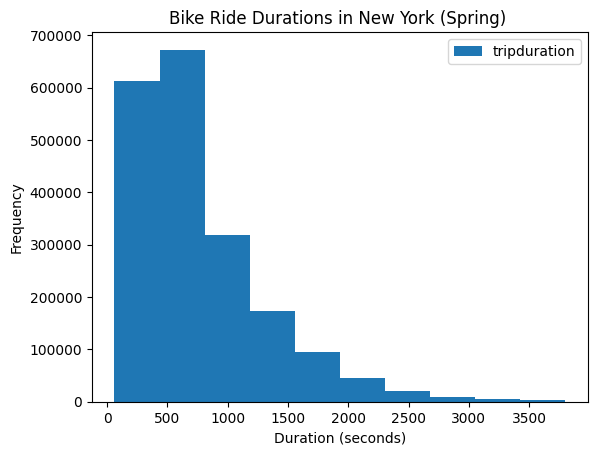

In [ ]:
import pyspark.sql.functions as F
import matplotlib.pyplot as plt

citi_spring = citi_spring.withColumn("tripduration", F.col("tripduration").cast("float"))

hist_citi_spring = citi_spring.filter("tripduration <= 3800")[["tripduration"]].toPandas()
print("sample of ",hist_citi_spring.count())

hist_citi_spring.plot(kind="hist") # do without and then repeat but set #bins same as Excel (presume 94 bins)
plt.title("Bike Ride Durations in New York (Spring) ")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.show()


In [ ]:
citi_spring = citi_spring.withColumn('tripduration', col('tripduration').cast('int'))

start_spring = (citi_spring.select("*")
         .groupBy("start station id", "start station name")).sum("tripduration").orderBy("sum(tripduration)", ascending=False)
# show top 10
start_spring.show(5)

+----------------+--------------------+-----------------+
|start station id|  start station name|sum(tripduration)|
+----------------+--------------------+-----------------+
|             499|  Broadway & W 60 St|         18952737|
|             519|E 42 St & Vanderb...|         17608086|
|             426|West St & Chamber...|         17307475|
|             521|     8 Ave & W 31 St|         15939067|
|             281|Grand Army Plaza ...|         15341428|
+----------------+--------------------+-----------------+
only showing top 5 rows



**EXPLORATORY DATA ANALYSIS - NEW YORK vs LONDON**

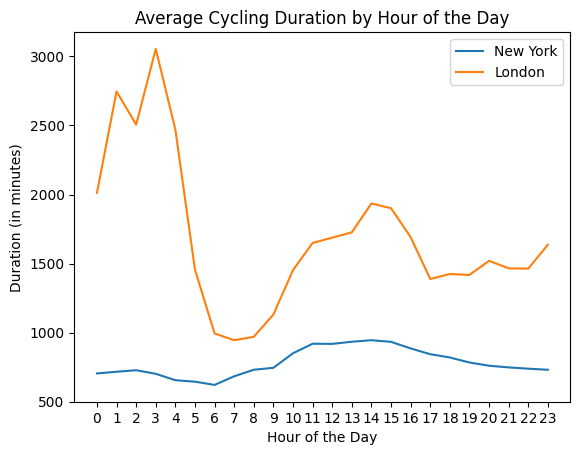

In [ ]:
from pyspark.sql.functions import avg, hour
import pyspark.sql.functions as F
import matplotlib.pyplot as plt

# assuming the dataframe is named 'bike_rentals_df'
avg_duration_by_hour_citi_spring = citi_spring.groupBy(hour('starttime').alias('hour')).agg(avg('tripduration').alias('avg_duration')) \
                                      .orderBy('hour').toPandas()

avg_duration_by_hour_spring = spring_df.groupBy(hour('Start Date').alias('hour')).agg(avg('Duration').alias('avg_duration')) \
                                      .orderBy('hour').toPandas()
                                      

plt.plot(avg_duration_by_hour_citi_spring['hour'], avg_duration_by_hour_citi_spring['avg_duration'], label='New York')
plt.plot(avg_duration_by_hour_spring['hour'], avg_duration_by_hour_spring['avg_duration'], label='London')
plt.title('Average Cycling Duration by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Duration (in minutes)')
plt.xticks(range(0, 24))
plt.legend()
plt.show()

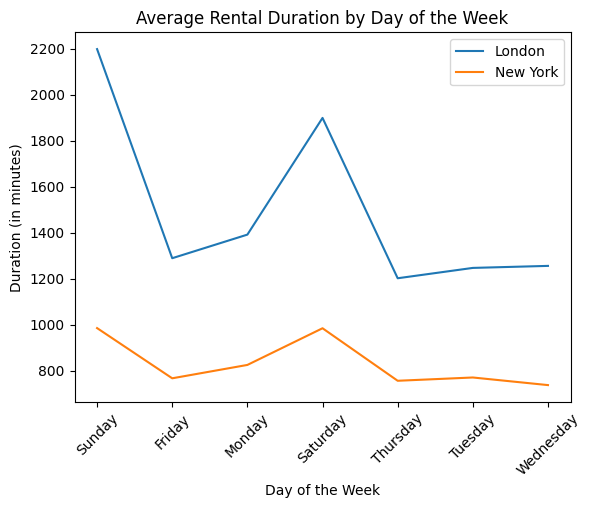

In [ ]:
avg_duration_by_day_spring = spring_df.groupBy(F.date_format('Start Date', 'EEEE').alias('day_of_week')).agg(avg('Duration').alias('avg_duration')) \
                                      .orderBy(F.when(F.col('day_of_week') == 'Sunday', 1).otherwise(2), 'day_of_week').toPandas()

citi_avg_duration_by_day_spring = citi_spring.groupBy(F.date_format('starttime', 'EEEE').alias('day_of_week')).agg(avg('tripduration').alias('avg_duration')) \
                                      .orderBy(F.when(F.col('day_of_week') == 'Sunday', 1).otherwise(2), 'day_of_week').toPandas()
                                      

plt.plot(avg_duration_by_day_spring['day_of_week'], avg_duration_by_day_spring['avg_duration'], label='London')
plt.plot(citi_avg_duration_by_day_spring['day_of_week'], citi_avg_duration_by_day_spring['avg_duration'], label='New York')
plt.title('Average Rental Duration by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Duration (in minutes)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


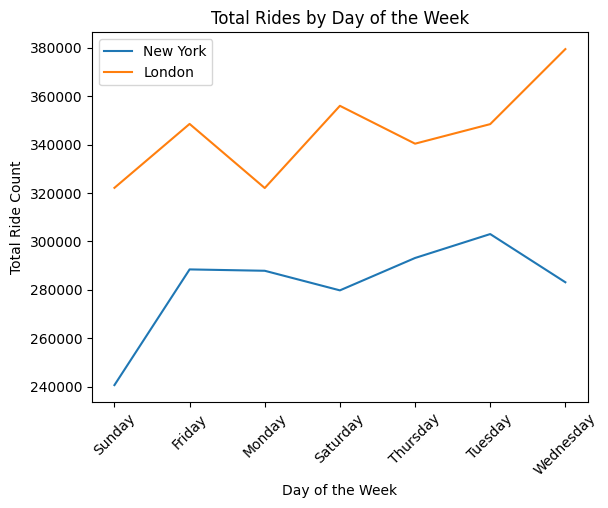

In [ ]:
# assuming the dataframe is named 'bike_rentals_df'
spring_rides_london = spring_df.groupBy(F.date_format('Start Date', 'EEEE').alias('day_of_week')).agg(count('*').alias('London Rides')) \
                                      .orderBy(F.when(F.col('day_of_week') == 'Sunday', 1).otherwise(2), 'day_of_week').toPandas()

spring_rides_newyork = citi_spring.groupBy(F.date_format('starttime', 'EEEE').alias('day_of_week')).agg(count('*').alias('New York Rides')) \
                                      .orderBy(F.when(F.col('day_of_week') == 'Sunday', 1).otherwise(2), 'day_of_week').toPandas()
                                      

plt.plot(spring_rides_newyork['day_of_week'], spring_rides_newyork['New York Rides'], label='New York')
plt.plot(spring_rides_london['day_of_week'], spring_rides_london['London Rides'], label='London')
plt.title('Total Rides by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Ride Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
# FEature Engineering to create a new column called tripid and fill with auto-incremented integers
# To enable us count the number of trips 

from pyspark.sql.functions import row_number
from pyspark.sql.window import Window

# Define a window specification
window_spec = Window.orderBy("starttime")

# Add a new column with auto-incremented integer values
citi_spring = citi_spring.withColumn("tripid", row_number().over(window_spec))

# Show the updated dataframe
citi_spring.show(5)


+------------+-------------------+-------------------+----------------+--------------------+--------------+--------------------+------+------+
|tripduration|          starttime|           stoptime|start station id|  start station name|end station id|    end station name|bikeid|tripid|
+------------+-------------------+-------------------+----------------+--------------------+--------------+--------------------+------+------+
|         949|2014-03-01 00:00:16|2014-03-01 00:16:05|             317|   E 6 St & Avenue B|           284|Greenwich Ave & 8...| 17440|     1|
|         533|2014-03-01 00:00:57|2014-03-01 00:09:50|             457|  Broadway & W 58 St|           441|     E 52 St & 2 Ave| 20855|     2|
|         122|2014-03-01 00:01:06|2014-03-01 00:03:08|             146|Hudson St & Reade St|           276|Duane St & Greenw...| 15822|     3|
|         134|2014-03-01 00:01:14|2014-03-01 00:03:28|             146|Hudson St & Reade St|           276|Duane St & Greenw...| 17793|     4|

In [ ]:
# convert the Start Date column to a timestamp column for both spring and autumn dataframes
london_spring_month = spring_df.withColumn('Start Timestamp', to_timestamp('Start Date', 'yyyy-MM-dd HH:mm:ss'))
newyork_spring_month = citi_spring.withColumn('Start Timestamp', to_timestamp('starttime', 'yyyy-MM-dd HH:mm:ss'))

# calculate the total bike rides per month for both spring and autumn seasons
london_spring_monthly_rides = london_spring_month.groupBy(year('Start Timestamp').alias('year'), month('Start Timestamp').alias('month')) \
                                    .agg(count('*').alias('London Rides')) \
                                    .orderBy('year', 'month')
newyork_spring_monthly_rides = newyork_spring_month.groupBy(year('Start Timestamp').alias('year'), month('Start Timestamp').alias('month')) \
                                    .agg(count('*').alias('Newyork Rides')) \
                                    .orderBy('year', 'month')


# convert the resulting dataframes to Pandas dataframes for better visualization
london_spring_monthly_rides_pd = london_spring_monthly_rides.toPandas()
newyork_spring_monthly_rides_pd = newyork_spring_monthly_rides.toPandas()

# print the resulting dataframes
print("Total monthly rides (London)")
print(london_spring_monthly_rides_pd)

print("\nTotal monthly rides (Newyork)")
print(newyork_spring_monthly_rides_pd)

Total monthly rides (London)
   year  month  London Rides
0  2014      3        746214
1  2014      4        793917
2  2014      5        876810

Total monthly rides (Newyork)
   year  month  Newyork Rides
0  2014      3         439117
1  2014      4         670780
2  2014      5         866117


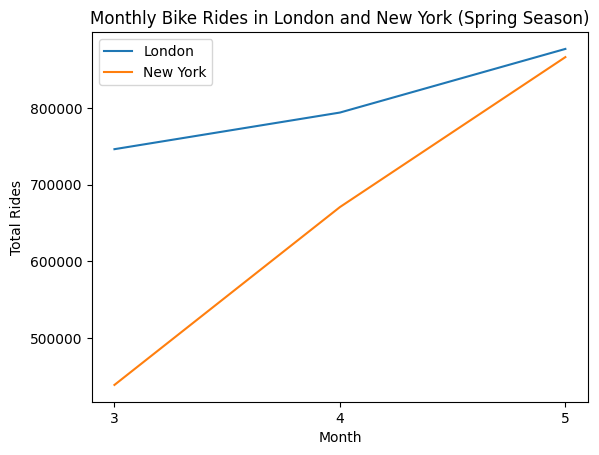

In [ ]:
import matplotlib.pyplot as plt

# plot London monthly ride data
plt.plot(london_spring_monthly_rides_pd['month'], london_spring_monthly_rides_pd['London Rides'], label='London')

# plot New York monthly ride data
plt.plot(newyork_spring_monthly_rides_pd['month'], newyork_spring_monthly_rides_pd['Newyork Rides'], label='New York')

# set plot title and labels
plt.title('Monthly Bike Rides in London and New York (Spring Season)')
plt.xlabel('Month')
plt.ylabel('Total Rides')

# set x-axis ticks
plt.xticks([3, 4, 5])

# add legend
plt.legend()

# show plot
plt.show()


In [ ]:
spring_df.show(2)
citi_spring.show(2)

+---------+--------+-------+-------------------+-------------+--------------------+-------------------+---------------+--------------------+
|Rental Id|Duration|Bike Id|           End Date|EndStation Id|     EndStation Name|         Start Date|StartStation Id|   StartStation Name|
+---------+--------+-------+-------------------+-------------+--------------------+-------------------+---------------+--------------------+
| 33253206|  1140.0|  11439|2014-05-27 00:59:00|          695|Islington Green, ...|2014-05-27 00:40:00|             81|Great Titchfield ...|
| 33345935|   660.0|  10792|2014-05-30 18:00:00|          326|Graham Street, Angel|2014-05-30 17:49:00|            203|West Smithfield R...|
+---------+--------+-------+-------------------+-------------+--------------------+-------------------+---------------+--------------------+
only showing top 2 rows

+------------+-------------------+-------------------+----------------+------------------+--------------+--------------------+---

In [ ]:
# Feature engineering to re-order the the column index of the dataframes with bike rides during Spring for merging of the dataframes

from pyspark.sql.functions import col

lnd_spring = spring_df.select(col("Rental Id"), col("Duration"), col("Start Date"), col("End Date"), col("StartStation Name"), col("EndStation Name"))
nyc_spring = citi_spring.select(col("tripid"), col("tripduration"), col("starttime"), col("stoptime"), col("start station name"), col("end station name"))



In [ ]:
lnd_spring.show(2)
nyc_spring.show(2)

+---------+--------+-------------------+-------------------+--------------------+--------------------+
|Rental Id|Duration|         Start Date|           End Date|   StartStation Name|     EndStation Name|
+---------+--------+-------------------+-------------------+--------------------+--------------------+
| 33253206|  1140.0|2014-05-27 00:40:00|2014-05-27 00:59:00|Great Titchfield ...|Islington Green, ...|
| 33345935|   660.0|2014-05-30 17:49:00|2014-05-30 18:00:00|West Smithfield R...|Graham Street, Angel|
+---------+--------+-------------------+-------------------+--------------------+--------------------+
only showing top 2 rows

+------+------------+-------------------+-------------------+------------------+--------------------+
|tripid|tripduration|          starttime|           stoptime|start station name|    end station name|
+------+------------+-------------------+-------------------+------------------+--------------------+
|     1|         949|2014-03-01 00:00:16|2014-03-01

In [ ]:
# Create an additional feature called City for uniquely identifying rides between both cities

from pyspark.sql.functions import lit

lnd_spring = lnd_spring.withColumn('city', lit('London'))
nyc_spring = nyc_spring.withColumn('city', lit('New York'))

In [ ]:
# Merge both dataframes into one single dataframe using the union operator

spring_rides_df = lnd_spring.union(nyc_spring)

In [ ]:
# spring_rides_df.sample(5)
spring_rides_df[["city"]].distinct().show()

+--------+
|    city|
+--------+
|  London|
|New York|
+--------+



In [ ]:
spring_rides_df.printSchema()

root
 |-- Rental Id: string (nullable = true)
 |-- Duration: float (nullable = true)
 |-- Start Date: timestamp (nullable = true)
 |-- End Date: timestamp (nullable = true)
 |-- StartStation Name: string (nullable = true)
 |-- EndStation Name: string (nullable = true)
 |-- city: string (nullable = false)



In [ ]:
# Compare total records of bike rides between London and New York to the new dataframe to ascertain it was merged correctly

lnd_spring.count(), nyc_spring.count(), spring_rides_df.count()

(2416941, 1976014, 4392955)

**Hypothesis Test 2: "In 2014, the mean ride durations during spring in London and New York are equal"**

In [ ]:
from pyspark.sql.functions import col, month
from scipy.stats import ttest_ind

# filter the dataset for only rides during spring
spring_rides_update = spring_rides_df.filter((month(col("Start Date")) >= 3) | (month(col("Start Date")) <= 5))

# calculate mean ride duration for London and New York during spring
london_spring_mean_duration = spring_rides_update.filter(col("City") == "London").agg({"Duration": "avg"}).collect()[0][0]
newyork_spring_mean_duration = spring_rides_update.filter(col("City") == "New York").agg({"Duration": "avg"}).collect()[0][0]

# perform two-sample t-test
t_stat, p_value = ttest_ind(
    spring_rides_update.filter(col("City") == "London").select("Duration").rdd.flatMap(lambda x: x).collect(),
    spring_rides_update.filter(col("City") == "New York").select("Duration").rdd.flatMap(lambda x: x).collect(),
    equal_var=False
)

# check if the p-value is significant
if p_value < 0.05:
    print("The p-value is", p_value, "which is less than the significance level of 0.05.")
    if london_spring_mean_duration > newyork_spring_mean_duration:
        print("Therefore, we reject the null hypothesis that the mean ride duration is equal in London and New York during Autumn.")
        print("Furthermore, the mean ride duration in London is significantly longer than in New York during Autumn.")
    else:
        print("Therefore, we reject the null hypothesis that the mean ride duration is equal in London and New York during Autumn.")
        print("Furthermore, the mean ride duration in New York is significantly longer than in London during Autumn.")
else:
    print("The p-value is", p_value, "which is greater than the significance level of 0.05.")
    print("Therefore, we fail to reject the null hypothesis that the mean ride duration is equal in London and New York during Autumn.")


The p-value is 0.0 which is less than the significance level of 0.05.
Therefore, we reject the null hypothesis that the mean ride duration is equal in London and New York during Autumn.
Furthermore, the mean ride duration in London is significantly longer than in New York during Autumn.


In [ ]:
newyork_spring_mean_duration, london_spring_mean_duration

(827.065987386729, 1489.659689665573)

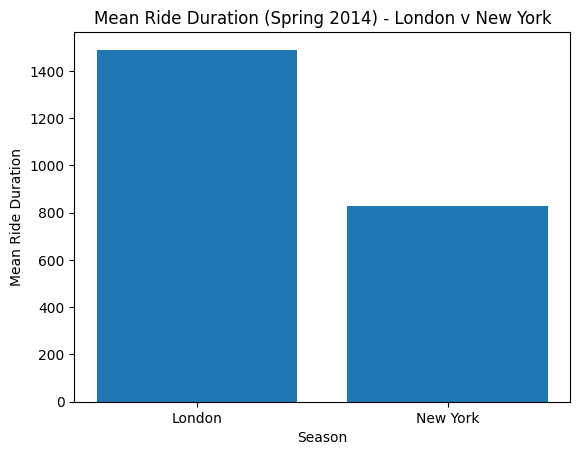

In [ ]:
# Define the durations and corresponding labels

duration_spring = [london_spring_mean_duration, newyork_spring_mean_duration]
labels = ['London', 'New York']

# Plotting the bar chart
plt.bar(labels, duration_spring)
plt.xlabel('Season')
plt.ylabel('Mean Ride Duration')
plt.title('Mean Ride Duration (Spring 2014) - London v New York')
plt.show()
